In [1]:
%config InlineBackend.figure_format = "retina"

In [2]:
import jupyter_black

jupyter_black.load(lab=False)

<IPython.core.display.Javascript object>

In [3]:
from importlib import resources

from jax import grad, jit, vmap
import jax.numpy as jnp
import mols2grid
import numpy as np
import pymbar
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

import timemachine

# Relative hydration free energy

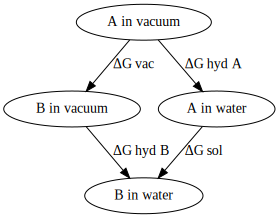

In [4]:
import graphviz

g = graphviz.Digraph()
g.node("A", label="A in vacuum")
g.node("B", label="B in vacuum")
g.node("AW", label="A in water")
g.node("BW", label="B in water")
g.edge("A", "B", label="<ΔG<SUB>vac</SUB>>")
g.edge("AW", "BW", label="<ΔG<SUB>sol</SUB>>")
g.edge("A", "AW", label="<ΔG<SUB>hyd A</SUB>>")
g.edge("B", "BW", label="<ΔG<SUB>hyd B</SUB>>")
g

\begin{equation}
0 = \Delta G_{\text{vac}} - \Delta G_{\text{sol}} - \Delta G_{\text{hyd A}} + \Delta G_{\text{hyd B}}
\end{equation}

\begin{equation}
\Delta \Delta G_{\text{hyd}} = \Delta G_{\text{hyd B}} - \Delta G_{\text{hyd A}} = \Delta G_{\text{sol}} - \Delta G_{\text{vac}}
\end{equation}

## Atom mapping

In [5]:
from timemachine.datasets import fetch_freesolv
from timemachine.fe import atom_mapping
from timemachine.fe.utils import get_mol_name, plot_atom_mapping_grid

In [6]:
mols = {get_mol_name(mol): mol for mol in fetch_freesolv()}

[08:57:15] Warning: molecule is tagged as 3D, but all Z coords are zero


In [7]:
mol_a = mols["mobley_3053621"]
mol_b = mols["mobley_3398536"]

In [8]:
mols2grid.display([mol_a, mol_b])

In [9]:
def compute_atom_mapping(threshold=2.0):
    assert mol_a.GetNumAtoms() == mol_b.GetNumAtoms()
    mcs_result = atom_mapping.mcs(mol_a, mol_b, threshold)
    query_mol = Chem.MolFromSmarts(mcs_result.smartsString)
    core = atom_mapping.get_core_by_mcs(mol_a, mol_b, query_mol, threshold)
    assert len(core) == mol_a.GetNumAtoms()
    return core, mcs_result.smartsString

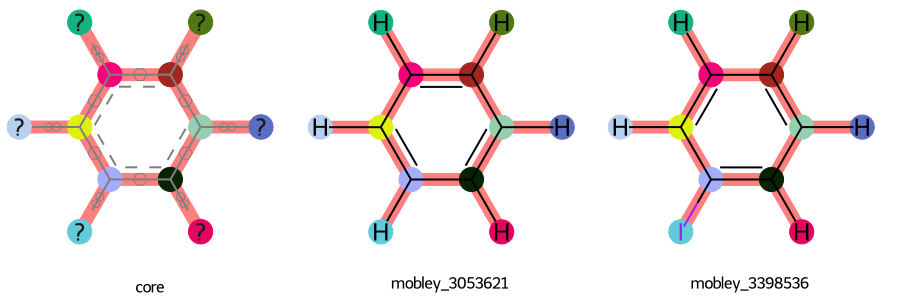

In [10]:
core, core_smarts = compute_atom_mapping()
plot_atom_mapping_grid(mol_a, mol_b, core_smarts, core)

## Vacuum leg

In [11]:
from timemachine.constants import DEFAULT_FF
from timemachine.fe.rbfe import estimate_relative_free_energy
from timemachine.ff import Forcefield

In [12]:
forcefield = Forcefield.load_from_file(DEFAULT_FF)

In [13]:
import diskcache as dc  # optional; used to cache results

cache = dc.Cache(".cache")
estimate_relative_free_energy = cache.memoize()(estimate_relative_free_energy)

----------------------------------------------------------------------
performing BFGS minimization on 12 atoms
(holding the other 0 atoms frozen)
U(x_0) = 1843.214
         Current function value: 174.479223
         Iterations: 45
         Function evaluations: 135
         Gradient evaluations: 124
U(x_final) = 174.479
atom with highest force norm after minimization: 5
force(x_final)[5] = [ 0.71702435 -0.2382705   0.38456712]
----------------------------------------------------------------------
----------------------------------------------------------------------
performing BFGS minimization on 12 atoms
(holding the other 0 atoms frozen)
U(x_0) = 1743.584
         Current function value: 174.456425
         Iterations: 48
         Function evaluations: 216
         Gradient evaluations: 200
U(x_final) = 174.456
atom with highest force norm after minimization: 2
force(x_final)[2] = [-0.03836083  0.08853679 -0.00041229]
---------------------------------------------------------------

mobley_3053621_mobley_3398536_vacuum BAR: lambda 11 -> 12 dG: -0.067 +- 0.152 kJ/mol
----------------------------------------------------------------------
performing BFGS minimization on 12 atoms
(holding the other 0 atoms frozen)
U(x_0) = 707.340
         Current function value: 174.260834
         Iterations: 45
         Function evaluations: 135
         Gradient evaluations: 125
U(x_final) = 174.261
atom with highest force norm after minimization: 1
force(x_final)[1] = [-0.34545967  1.14795323  0.07459108]
----------------------------------------------------------------------
mobley_3053621_mobley_3398536_vacuum BAR: lambda 12 -> 13 dG: -0.072 +- 0.252 kJ/mol
----------------------------------------------------------------------
performing BFGS minimization on 12 atoms
(holding the other 0 atoms frozen)
U(x_0) = 511.466
         Current function value: 174.236982
         Iterations: 44
         Function evaluations: 183
         Gradient evaluations: 163
U(x_final) = 174.237
atom

mobley_3053621_mobley_3398536_vacuum BAR: lambda 14 -> 15 dG: 0.677 +- 1.076 kJ/mol
----------------------------------------------------------------------
performing BFGS minimization on 12 atoms
(holding the other 0 atoms frozen)
U(x_0) = 233.321
         Current function value: 174.169458
         Iterations: 41
         Function evaluations: 145
         Gradient evaluations: 137
U(x_final) = 174.169
atom with highest force norm after minimization: 5
force(x_final)[5] = [ 0.22839467 -0.05817135  0.13542623]
----------------------------------------------------------------------
mobley_3053621_mobley_3398536_vacuum BAR: lambda 15 -> 16 dG: 0.016 +- 0.318 kJ/mol
----------------------------------------------------------------------
performing BFGS minimization on 12 atoms
(holding the other 0 atoms frozen)
U(x_0) = 201.112
         Current function value: 174.132022
         Iterations: 46
         Function evaluations: 225
         Gradient evaluations: 201
U(x_final) = 174.132
atom w

mobley_3053621_mobley_3398536_vacuum BAR: lambda 27 -> 28 dG: -0.123 +- 0.043 kJ/mol
----------------------------------------------------------------------
performing BFGS minimization on 12 atoms
(holding the other 0 atoms frozen)
U(x_0) = 182.697
         Current function value: 173.856963
         Iterations: 12
         Function evaluations: 171
         Gradient evaluations: 143
U(x_final) = 173.857
atom with highest force norm after minimization: 5
force(x_final)[5] = [-18.81572958   0.79464601  -0.45522257]
----------------------------------------------------------------------
mobley_3053621_mobley_3398536_vacuum BAR: lambda 28 -> 29 dG: -0.049 +- 0.044 kJ/mol
CPU times: user 4min 46s, sys: 39.9 s, total: 5min 25s
Wall time: 5min 25s


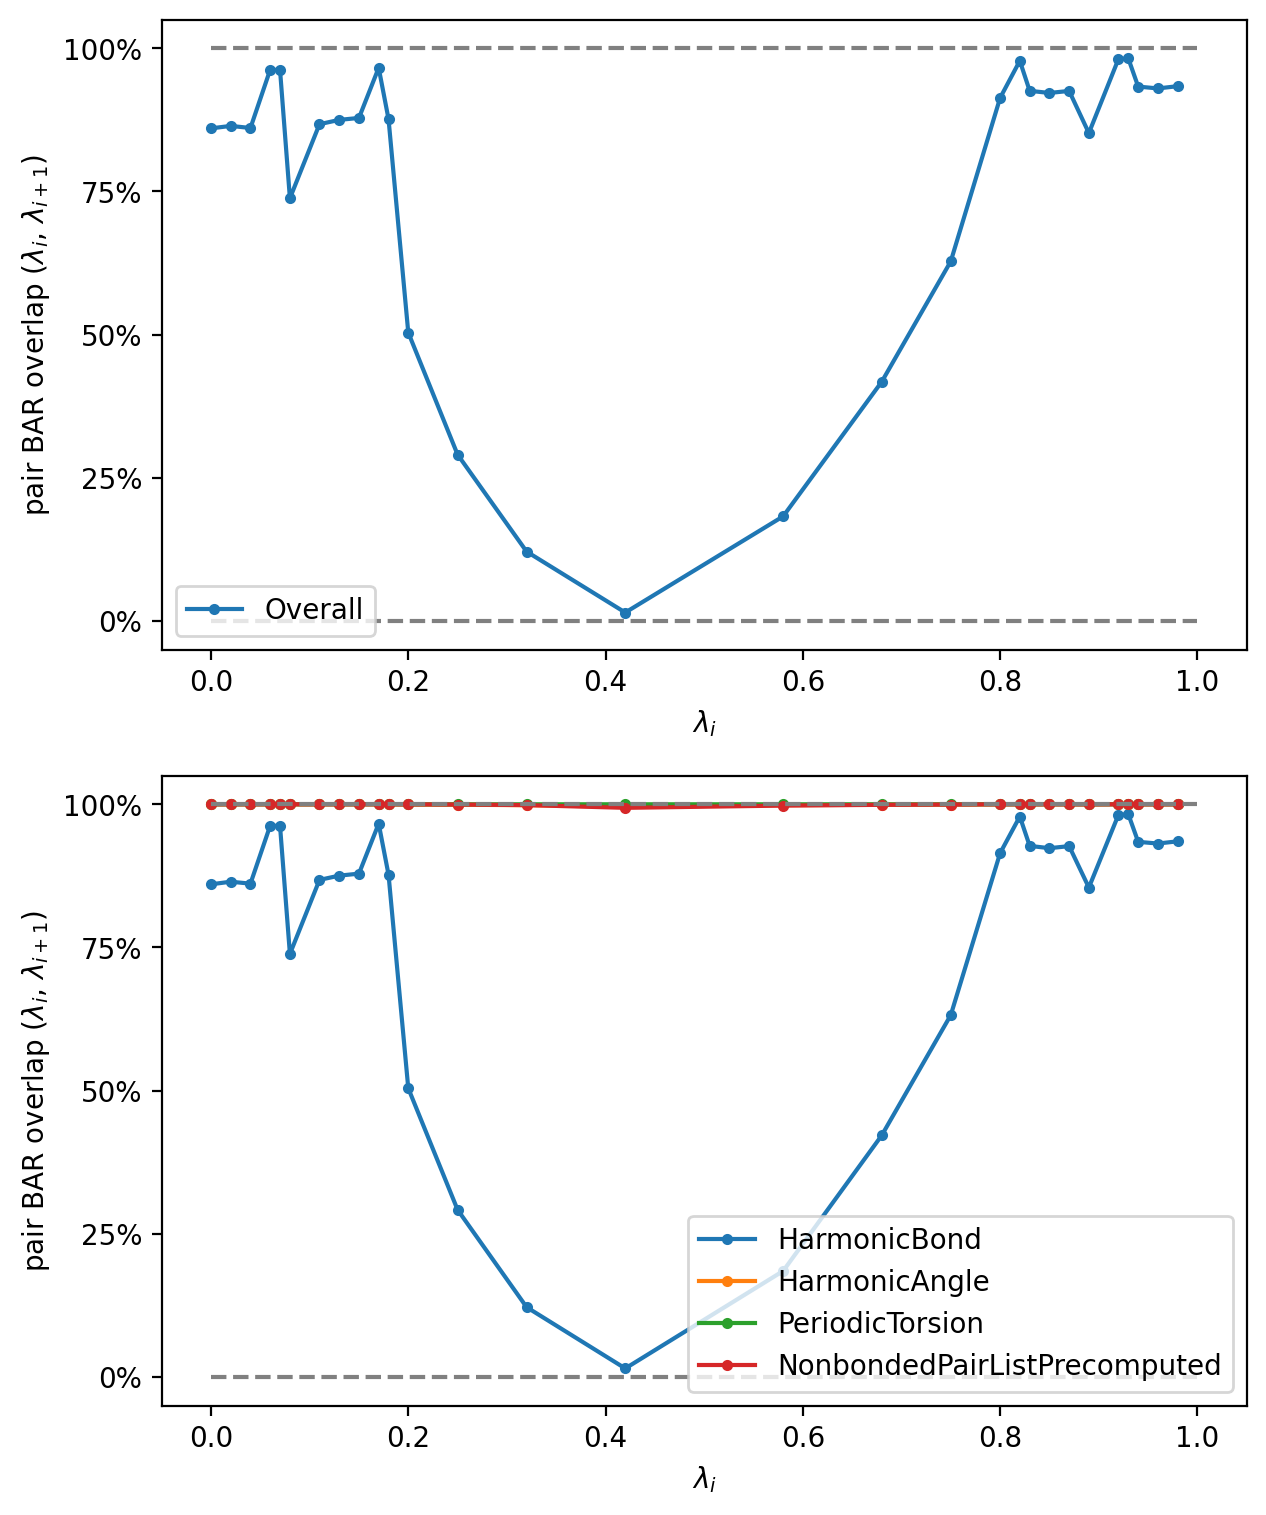

In [14]:
%%time
vacuum_res = estimate_relative_free_energy(
    mol_a,
    mol_b,
    core,
    forcefield,
    host_config=None,
    seed=123,
    n_frames=500,
    prefix="vacuum",
    n_eq_steps=2000,
)

In [15]:
def save_overlap_plots(result, prefix=""):
    with open(f"{prefix}_overlap_summary.png", "wb") as f:
        f.write(vacuum_res.overlap_summary_png)
    with open(f"{prefix}_overlap_detail.png", "wb") as f:
        f.write(vacuum_res.overlap_detail_png)

In [16]:
save_overlap_plots(vacuum_res, "vacuum")

In [17]:
from timemachine.constants import KCAL_TO_KJ

In [18]:
vacuum_dG = np.array(vacuum_res.all_dGs).sum() / KCAL_TO_KJ
vacuum_dG_err = np.linalg.norm(vacuum_res.all_errs) / KCAL_TO_KJ
vacuum_dG, vacuum_dG_err

(-0.2627400736925381, 0.3098969276896023)

## Solvent leg

In [20]:
vacuum_res.initial_states[1].x0

In [21]:
solvent_sys, solvent_conf, solvent_box, solvent_top = build_water_system(
    box_width=4.0, water_ff=DEFAULT_WATER_FF
)
solvent_box += np.diag([0.1, 0.1, 0.1])  # remove any possible clashes
solvent_host_config = HostConfig(solvent_sys, solvent_conf, solvent_box)

----------------------------------------------------------------------
performing BFGS minimization on 124 atoms
(holding the other 6170 atoms frozen)
U(x_0) = -102548.591
         Current function value: -104253.785256
         Iterations: 57
         Function evaluations: 140
         Gradient evaluations: 132
U(x_final) = -104253.785
atom with highest force norm after minimization: 6287
force(x_final)[6287] = [-1825.80884023  -330.95194923    56.22548274]
----------------------------------------------------------------------
----------------------------------------------------------------------
performing BFGS minimization on 124 atoms
(holding the other 6170 atoms frozen)
U(x_0) = -102648.282
         Current function value: -104256.254328
         Iterations: 52
         Function evaluations: 127
         Gradient evaluations: 122
U(x_final) = -104256.254
atom with highest force norm after minimization: 6287
force(x_final)[6287] = [-1761.57143831   -76.09339255    89.61656039]
---

         Current function value: -104248.511190
         Iterations: 36
         Function evaluations: 117
         Gradient evaluations: 109
U(x_final) = -104248.511
atom with highest force norm after minimization: 6284
force(x_final)[6284] = [2927.64486091  577.38149027   62.79947514]
----------------------------------------------------------------------
mobley_3053621_mobley_3398536_solvent BAR: lambda 11 -> 12 dG: 0.146 +- 0.153 kJ/mol
----------------------------------------------------------------------
performing BFGS minimization on 124 atoms
(holding the other 6170 atoms frozen)
U(x_0) = -103686.429
         Current function value: -104236.289508
         Iterations: 71
         Function evaluations: 203
         Gradient evaluations: 196
U(x_final) = -104236.290
atom with highest force norm after minimization: 6284
force(x_final)[6284] = [5640.49627144  152.40604318 -141.94435863]
----------------------------------------------------------------------
mobley_3053621_mobley_339

mobley_3053621_mobley_3398536_solvent BAR: lambda 14 -> 15 dG: 0.984 +- 1.032 kJ/mol
----------------------------------------------------------------------
performing BFGS minimization on 124 atoms
(holding the other 6170 atoms frozen)
U(x_0) = -104165.102
         Current function value: -104269.429815
         Iterations: 57
         Function evaluations: 134
         Gradient evaluations: 126
U(x_final) = -104269.430
atom with highest force norm after minimization: 1464
force(x_final)[1464] = [-947.39577172  574.1039352   576.89169662]
----------------------------------------------------------------------
mobley_3053621_mobley_3398536_solvent BAR: lambda 15 -> 16 dG: -0.001 +- 0.314 kJ/mol
----------------------------------------------------------------------
performing BFGS minimization on 124 atoms
(holding the other 6170 atoms frozen)
U(x_0) = -104198.361
         Current function value: -104261.997178
         Iterations: 33
         Function evaluations: 109
         Gradient e

mobley_3053621_mobley_3398536_solvent BAR: lambda 26 -> 27 dG: -0.124 +- 0.043 kJ/mol
----------------------------------------------------------------------
performing BFGS minimization on 124 atoms
(holding the other 6170 atoms frozen)
U(x_0) = -104222.434
         Current function value: -104277.976326
         Iterations: 50
         Function evaluations: 141
         Gradient evaluations: 131
U(x_final) = -104277.976
atom with highest force norm after minimization: 969
force(x_final)[969] = [-221.1967103  -363.57524275   84.74683186]
----------------------------------------------------------------------
mobley_3053621_mobley_3398536_solvent BAR: lambda 27 -> 28 dG: -0.170 +- 0.043 kJ/mol
----------------------------------------------------------------------
performing BFGS minimization on 124 atoms
(holding the other 6170 atoms frozen)
U(x_0) = -104219.673
         Current function value: -104272.920198
         Iterations: 41
         Function evaluations: 128
         Gradient ev

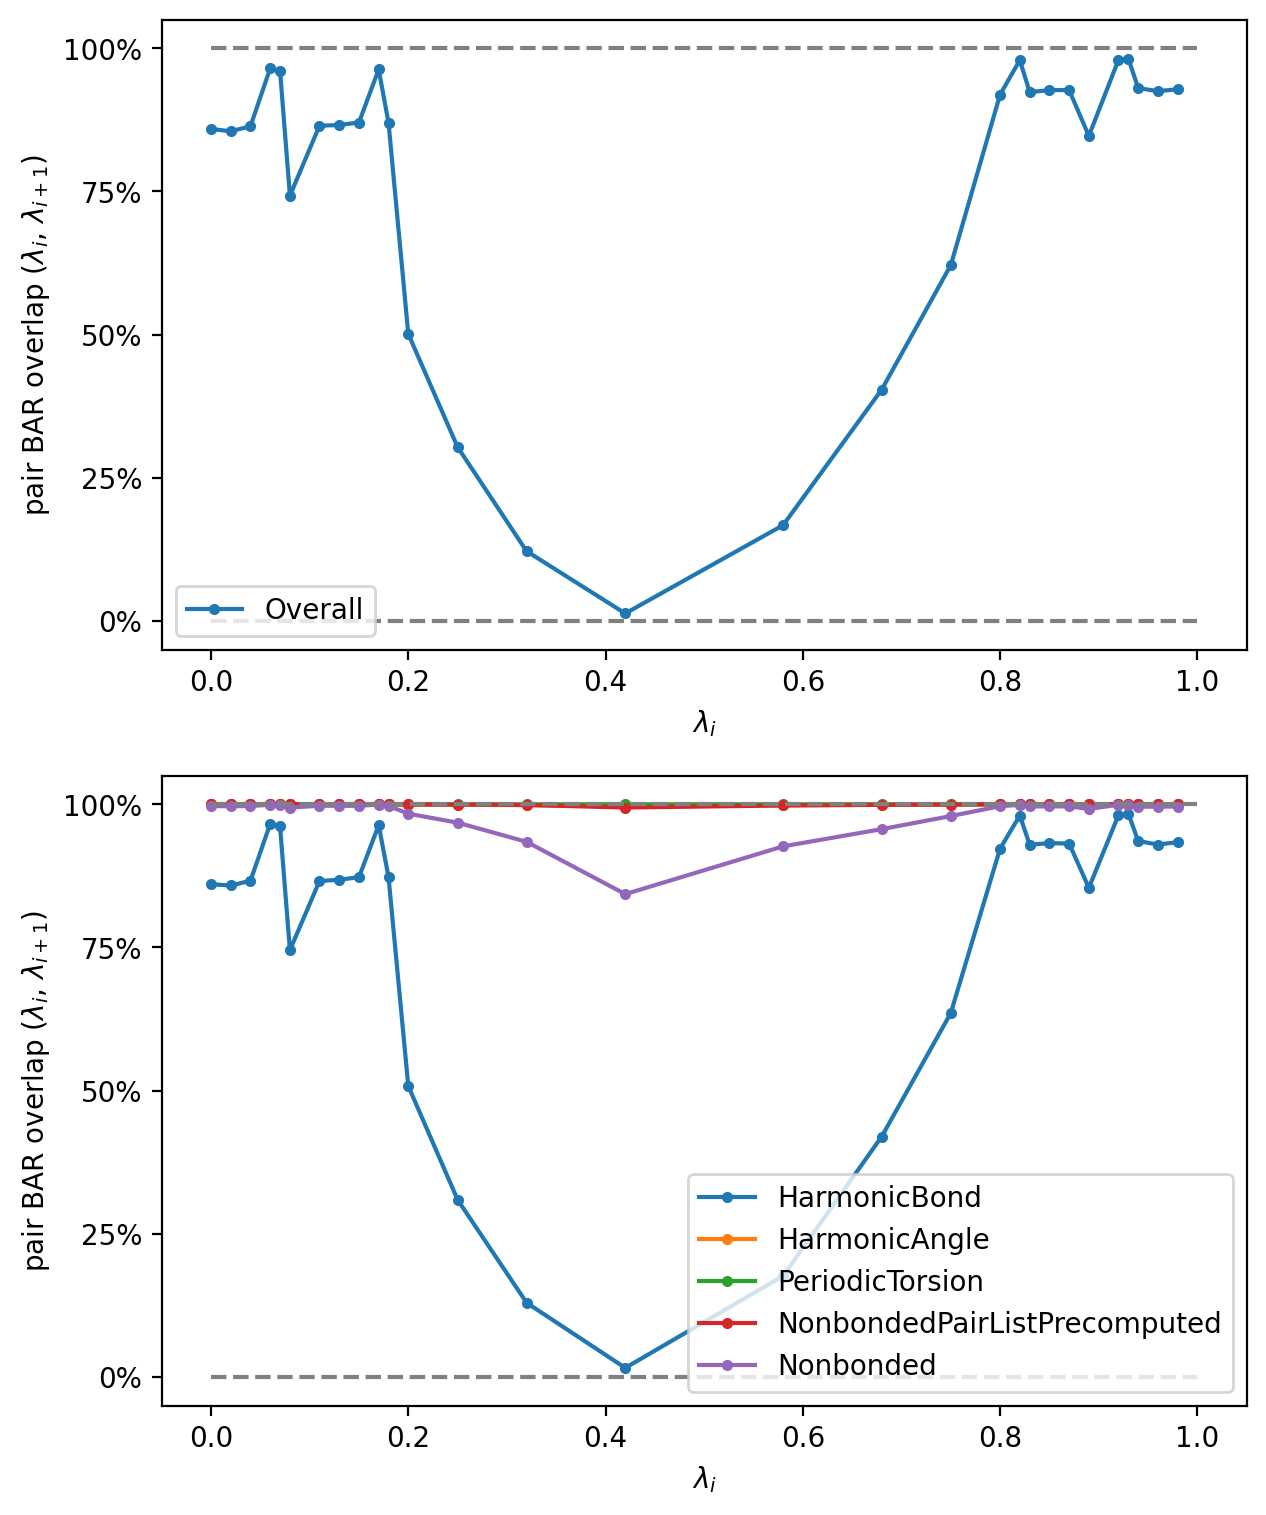

In [22]:
%%time
solvent_res = estimate_relative_free_energy(
    mol_a,
    mol_b,
    core,
    forcefield,
    solvent_host_config,
    seed=123,
    n_frames=500,
    prefix="solvent",
    n_eq_steps=2000,
)

In [23]:
save_overlap_plots(solvent_res, "solvent")

In [24]:
solvent_dG = np.array(solvent_res.all_dGs).sum() / KCAL_TO_KJ
solvent_dG_err = np.linalg.norm(solvent_res.all_errs) / KCAL_TO_KJ
solvent_dG, solvent_dG_err

(0.2984144234366426, 0.29602061554609743)

## $\Delta \Delta G_{\text{hyd}}$

In [25]:
ddG = solvent_dG - vacuum_dG
ddG_err = np.linalg.norm([solvent_dG_err, vacuum_dG_err])
ddG, ddG_err

(0.5611544971291806, 0.428560743208877)